# Uploading Kaggle Api

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bankusaha","key":"1a6eff5abbf65ee820118b6d14cdfede"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 79% 12.0M/15.1M [00:00<00:00, 22.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 16.8MB/s]


In [4]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

In [5]:
import os
os.listdir('brain_tumor_dataset')

['no', 'yes']

In [6]:
from sklearn.model_selection import train_test_split
import shutil

# Printing Sample Image

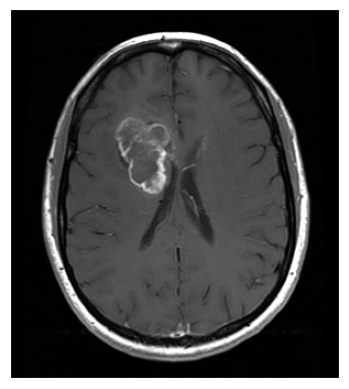

In [7]:
import matplotlib.pyplot as plt
import cv2

image_path = "/content/brain_tumor_dataset/yes/Y101.jpg"
img = cv2.imread(image_path)

if img is not None:
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
else:
  print("Image doesnot exist")


# Splitting into train, validation and test

In [8]:
no_tumor = "/content/brain_tumor_dataset/no"
yes_tumor = "/content/brain_tumor_dataset/yes"

no_tumor_images = [os.path.join(no_tumor,img) for img in os.listdir(no_tumor)]
yes_tumor_images = [os.path.join(yes_tumor,img) for img in os.listdir(yes_tumor)]

no_tumor_label = [0] * len(no_tumor_images)
yes_tumor_label = [1] * len(yes_tumor_images)

total_images = no_tumor_images + yes_tumor_images
total_labels = no_tumor_label + yes_tumor_label

X_train,X_temp,y_train,y_temp = train_test_split(total_images,total_labels,test_size = 0.3,stratify=total_labels,random_state = 20)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size = 0.7,stratify=y_temp,random_state = 20)

output_dir = {
    "train" : "/content/brain_tumor_dataset/train",
    "val" :  "/content/brain_tumor_dataset/val",
    "test" : "/content/brain_tumor_dataset/test"
}

for split in output_dir:
  os.makedirs(os.path.join(output_dir[split],"yes_tumor"),exist_ok=True)
  os.makedirs(os.path.join(output_dir[split],"no_tumor"),exist_ok = True)

def copy_images(image_paths, labels, split):
    for img_path, label in zip(image_paths, labels):
        category = "yes_tumor" if label == 1 else "no_tumor"
        dest_path = os.path.join(output_dir[split], category, os.path.basename(img_path))
        shutil.copy(img_path, dest_path)

copy_images(X_train,y_train,"train")
copy_images(X_val,y_val,"val")
copy_images(X_test,y_test,"test")

print("Dataset is successfully saved!")

Dataset is successfully saved!


In [9]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.4 MB/s eta 0:00:00


In [10]:
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

# Transforming my dataset

In [11]:
img_size = (224,224)
batch_size = 32

transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.Normalize(mean = [0.485,0.456,0.406],std = [0.229,0.224,0.225])
])

In [12]:
train_dataset = datasets.ImageFolder("/content/brain_tumor_dataset/train", transform=transform) # Access the correct training directory
val_dataset = datasets.ImageFolder("/content/brain_tumor_dataset/val", transform=transform)  # Access the correct validation directory
test_dataset = datasets.ImageFolder("/content/brain_tumor_dataset/test", transform=transform) # Access the correct testing directory

In [13]:
train_loader = DataLoader(train_dataset,batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_dataset,batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_dataset,batch_size = batch_size, shuffle = False)

In [14]:
image,label = next(iter(train_loader))
print(image.shape)

torch.Size([32, 3, 224, 224])


# Plotting the images(train,test and validation)

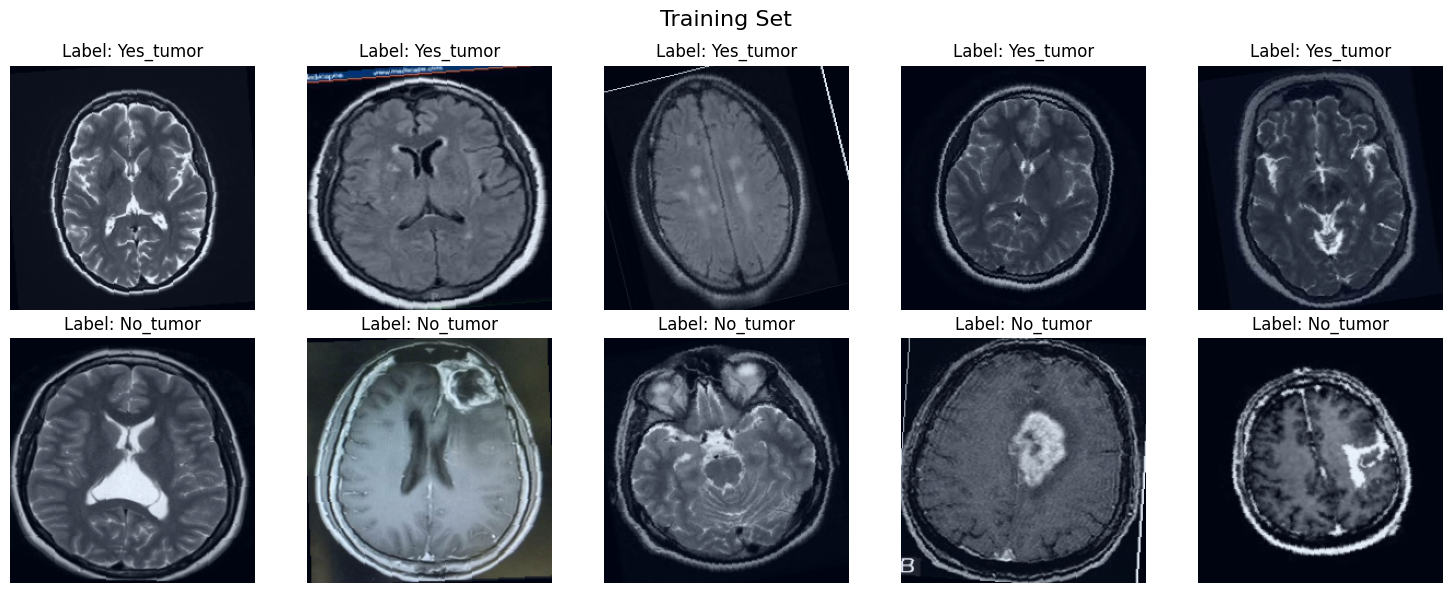

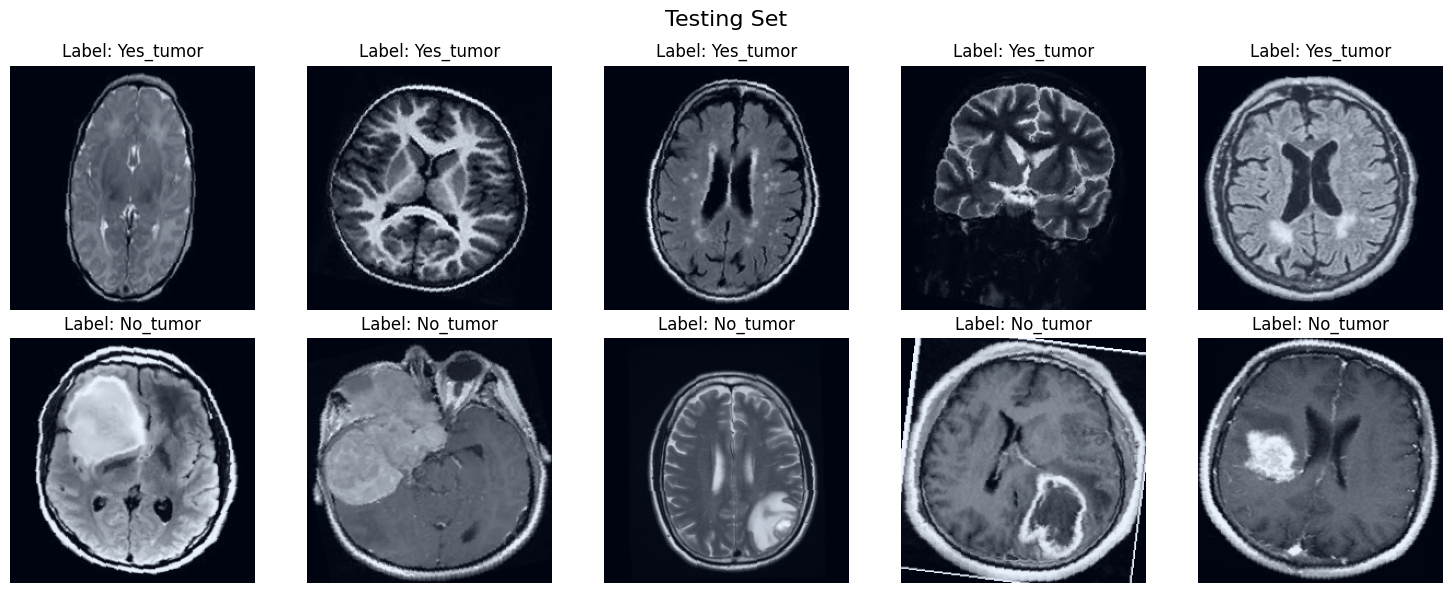

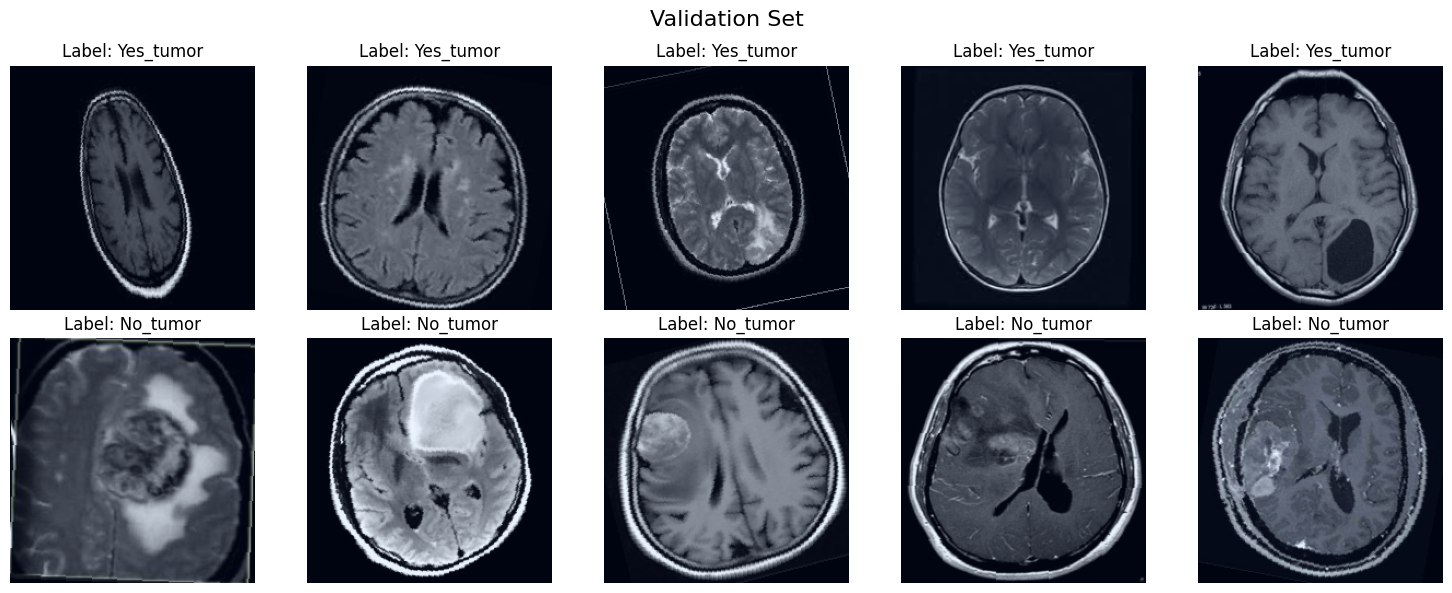

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

def plot_balanced_images(dataloader, class_names, title, num_per_class=5):
    images_collected = {class_name: [] for class_name in class_names}

    for images, labels in dataloader:
        labels = labels.numpy()

        for img, label in zip(images, labels):
            class_name = class_names[label]
            if len(images_collected[class_name]) < num_per_class:
                images_collected[class_name].append(img)

        if all(len(images_collected[class_name]) >= num_per_class for class_name in class_names):
            break

    selected_images = []
    labels = []
    for class_name in class_names:
        selected_images.extend(images_collected[class_name][:num_per_class])
        labels.extend([class_name.capitalize()] * num_per_class)

    num_rows = 2 if num_per_class > 1 else 1
    fig, axes = plt.subplots(num_rows, num_per_class, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)

    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, (img, label) in enumerate(zip(selected_images, labels)):
        ax = axes[i // num_per_class, i % num_per_class]
        img = img.permute(1, 2, 0).numpy()
        img = (img - img.min()) / (img.max() - img.min())
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Label: {label}")

    plt.tight_layout()
    plt.show()

class_names = ["yes_tumor", "no_tumor"]

plot_balanced_images(train_loader, class_names, "Training Set")
plot_balanced_images(test_loader, class_names, "Testing Set")
plot_balanced_images(val_loader, class_names, "Validation Set")


In [16]:
import torch
import torch.nn as nn

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BrainTumorClassificationCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(BrainTumorClassificationCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.dropout3 = nn.Dropout(0.25)

        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc1 = nn.Linear(128, 256)
        self.bn_fc1 = nn.BatchNorm1d(256)
        self.dropout_fc1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.dropout1(x)

        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout2(x)

        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout3(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)

        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout_fc1(x)

        x = torch.sigmoid(self.fc2(x))
        return x

model = BrainTumorClassificationCNN(num_classes=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

print(model)


BrainCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.25, inplace=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (bn_fc1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout_fc1): Dropout(p=0.5, inplace=False)
  (fc2): L

In [19]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 29.8 MB/s eta 0:00:00


In [20]:
import torch.nn.functional as F
import torchmetrics
import copy

# Training The Model

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchmetrics
import copy

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.counter = 0

    def check_early_stop(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    early_stopping = EarlyStopping(patience=patience)
    best_val_loss = float('inf')
    best_model_state = None

    accuracy_metric = torchmetrics.Accuracy(task="binary").to(device)
    f1_metric = torchmetrics.F1Score(task="binary").to(device)
    recall_metric = torchmetrics.Recall(task="binary").to(device)

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True, min_lr=1e-6, eps=1e-08)

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_accuracy, train_f1, train_recall = 0, 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.float().to(device)

            optimizer.zero_grad()
            outputs = model(images)

            labels = F.one_hot(labels.long(), num_classes=2).float()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            preds = (outputs >= 0.5).float()

            train_loss += loss.item()
            train_accuracy += accuracy_metric(preds, labels)
            train_f1 += f1_metric(preds, labels)
            train_recall += recall_metric(preds, labels)

        train_loss /= len(train_loader)
        train_accuracy /= len(train_loader)
        train_f1 /= len(train_loader)
        train_recall /= len(train_loader)

        model.eval()
        val_loss, val_accuracy, val_f1, val_recall = 0, 0, 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.float().to(device)

                outputs = model(images).squeeze()
                labels = F.one_hot(labels.long(), num_classes=2).float()
                loss = criterion(outputs, labels)

                preds = (outputs >= 0.5).float()

                val_loss += loss.item()
                val_accuracy += accuracy_metric(preds, labels)
                val_f1 += f1_metric(preds, labels)
                val_recall += recall_metric(preds, labels)

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader)
        val_f1 /= len(val_loader)
        val_recall /= len(val_loader)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}, Recall: {val_recall:.4f}")

        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = copy.deepcopy(model.state_dict())
            torch.save(best_model_state, "best_model.pth")
            print("Model Saved!")

        if early_stopping.check_early_stop(val_loss):
            print(f"Early stopping triggered after {epoch + 1} epochs!")
            break

    model.load_state_dict(best_model_state)
    return model


trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25, patience=5)


Epoch 1/25, Train Loss: 0.6322, Val Loss: 0.6815, Accuracy: 0.5227, F1 Score: 0.4000, Recall: 0.3182
Model Saved!
Epoch 2/25, Train Loss: 0.5685, Val Loss: 0.6663, Accuracy: 0.5455, F1 Score: 0.5652, Recall: 0.5909
Model Saved!
Epoch 3/25, Train Loss: 0.5520, Val Loss: 0.6249, Accuracy: 0.7273, F1 Score: 0.7500, Recall: 0.8182
Model Saved!
Epoch 4/25, Train Loss: 0.5600, Val Loss: 0.5594, Accuracy: 0.7955, F1 Score: 0.8000, Recall: 0.8182
Model Saved!
Epoch 5/25, Train Loss: 0.5479, Val Loss: 0.5663, Accuracy: 0.7273, F1 Score: 0.7273, Recall: 0.7273
Epoch 6/25, Train Loss: 0.5114, Val Loss: 0.5233, Accuracy: 0.7500, F1 Score: 0.7442, Recall: 0.7273
Model Saved!
Epoch 7/25, Train Loss: 0.5290, Val Loss: 0.4430, Accuracy: 0.8182, F1 Score: 0.8182, Recall: 0.8182
Model Saved!
Epoch 8/25, Train Loss: 0.5293, Val Loss: 0.8362, Accuracy: 0.6364, F1 Score: 0.6364, Recall: 0.6364
Epoch 9/25, Train Loss: 0.5083, Val Loss: 1.2510, Accuracy: 0.6364, F1 Score: 0.6364, Recall: 0.6364
Epoch 10/25, 

# Loading The Model

In [22]:
model.load_state_dict(torch.load('/content/best_model.pth'))

<ipython-input-22-ed4a627f4e77>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/best_model.pth'))


<All keys matched successfully>

# Prediction on sample

In [23]:
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def predict(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)

    predicted_class = torch.argmax(output, dim=1).item()

    class_labels = ["no_tumor" , "yes_tumor"]
    predicted_label = class_labels[predicted_class]

    print(f"Predicted Class Index: {predicted_class}, Label: {predicted_label}")
    return predicted_class, predicted_label

image_path = "/content/yes/Y10.jpg"
predict(image_path)


Predicted Class Index: 1, Label: yes_tumor


(1, 'yes_tumor')

# number of Model Parameters

In [24]:
print(sum(p.numel() for p in model.parameters()))

127746
